In [5]:
import pyart
import matplotlib.pyplot as plt

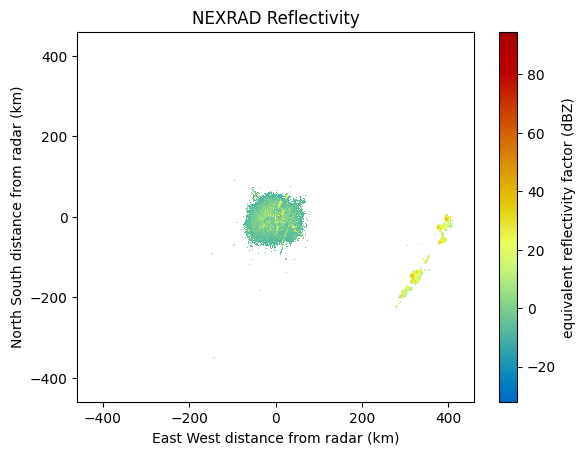

In [9]:
#Open files
#NEXRAD Level 2 data

# Write this in terminal to download data from AWS CLI. Example from 2019 here. 
#aws s3 cp s3://noaa-nexrad-level2/2019/10/01/KABR/ your_path --recursive --no-sign-request
#aws s3 cp s3://noaa-nexrad-level2/2019/10/01/KABR/ /Users/chloe/Documents/GITHUB/Radar --recursive --no-sign-request


# Path to your downloaded NEXRAD file
nexrad_file = '/Users/chloe/Documents/GITHUB/Radar/KABR20191001_000556_V06'

# Read the radar data
radar = pyart.io.read_nexrad_archive(nexrad_file)


In [15]:

#Exploring the data


file_name = "KABR20191001_000556_V06"

# Extract components
station_code = file_name[0:4]
date = file_name[4:12]
time = file_name[13:19]
version = file_name[20:]

# Format date and time
formatted_date = f"{date[0:4]}-{date[4:6]}-{date[6:8]}"
formatted_time = f"{time[0:2]}:{time[2:4]}:{time[4:6]}"

#Display lat, long, alt and name of station_code
def get_station_info(code, station_info):
    info = station_info.get(code, None)
    if info:
        return info
    else:
        return "Station information not found."

station_info  = {
    "KABR": {"lat": 45.45583, "lon": -98.41306, "elev": 1302},
    "KABX": {"lat": 35.14972, "lon": -106.82333, "elev": 5870},
    "KAKQ": {"lat": 36.98389, "lon": -77.0075, "elev": 112},
    "KAMA": {"lat": 35.23333, "lon": -101.70889, "elev": 3587},
    "KAMX": {"lat": 25.61056, "lon": -80.41306, "elev": 14},
    "KAPX": {"lat": 44.90722, "lon": -84.71972, "elev": 1464},
    "KARX": {"lat": 43.82278, "lon": -91.19111, "elev": 1276},
    "KATX": {"lat": 48.19472, "lon": -122.49444, "elev": 494},
    "KBBX": {"lat": 39.49611, "lon": -121.63167, "elev": 173},
    "KBGM": {"lat": 42.19972, "lon": -75.985, "elev": 1606},
    "KBHX": {"lat": 40.49833, "lon": -124.29194, "elev": 2402},
    "KBIS": {"lat": 46.77083, "lon": -100.76028, "elev": 1658},
    "KBLX": {"lat": 45.85389, "lon": -108.60611, "elev": 3598},
    "KBMX": {"lat": 33.17194, "lon": -86.76972, "elev": 645},
    "KBOX": {"lat": 41.95583, "lon": -71.1375, "elev": 118},
    "KBRO": {"lat": 25.91556, "lon": -97.41861, "elev": 23},
    "KBUF": {"lat": 42.94861, "lon": -78.73694, "elev": 693},
    "KBYX": {"lat": 24.59694, "lon": -81.70333, "elev": 8},
    "KCAE": {"lat": 33.94861, "lon": -81.11861, "elev": 231},
    "KCBW": {"lat": 46.03917, "lon": -67.80694, "elev": 746},
    "KCBX": {"lat": 43.49083, "lon": -116.23444, "elev": 3061},
    "KCCX": {"lat": 40.92306, "lon": -78.00389, "elev": 2405},
    "KCLE": {"lat": 41.41306, "lon": -81.86, "elev": 763},
    "KCLX": {"lat": 32.65556, "lon": -81.04222, "elev": 97},
    "KCRI": {"lat": 35.2383, "lon": -97.4602, "elev": 1201},
    "KCRP": {"lat": 27.78389, "lon": -97.51083, "elev": 45},
    "KCXX": {"lat": 44.51111, "lon": -73.16639, "elev": 317},
    "KCYS": {"lat": 41.15194, "lon": -104.80611, "elev": 6128},
    "KDAX": {"lat": 38.50111, "lon": -121.67667, "elev": 30},
    "KDDC": {"lat": 37.76083, "lon": -99.96833, "elev": 2590},
    "KDFX": {"lat": 29.2725, "lon": -100.28028, "elev": 1131},
    "KDGX": {"lat": 32.28, "lon": -89.98444, "elev": -99999},
    "KDIX": {"lat": 39.94694, "lon": -74.41111, "elev": 149},
    "KDLH": {"lat": 46.83694, "lon": -92.20972, "elev": 1428},
    "KDMX": {"lat": 41.73111, "lon": -93.72278, "elev": 981},
    "KDOX": {"lat": 38.82556, "lon": -75.44, "elev": 50},
    "KDTX": {"lat": 42.69972, "lon": -83.47167, "elev": 1072},
    "KDVN": {"lat": 41.61167, "lon": -90.58083, "elev": 754},
    "KDYX": {"lat": 32.53833, "lon": -99.25417, "elev": 1517},
    "KEAX": {"lat": 38.81028, "lon": -94.26417, "elev": 995},
    "KEMX": {"lat": 31.89361, "lon": -110.63028, "elev": 5202},
    "KENX": {"lat": 42.58639, "lon": -74.06444, "elev": 1826},
    "KEOX": {"lat": 31.46028, "lon": -85.45944, "elev": 434},
    "KEPZ": {"lat": 31.87306, "lon": -106.6975, "elev": 4104},
    "KESX": {"lat": 35.70111, "lon": -114.89139, "elev": 4867},
    "KEVX": {"lat": 30.56417, "lon": -85.92139, "elev": 140},
    "KEWX": {"lat": 29.70361, "lon": -98.02806, "elev": 633},
    "KEYX": {"lat": 35.09778, "lon": -117.56, "elev": 2757},
    "KFCX": {"lat": 37.02417, "lon": -80.27417, "elev": 2868},
    "KFDR": {"lat": 34.36222, "lon": -98.97611, "elev": 1267},
    "KFDX": {"lat": 34.63528, "lon": -103.62944, "elev": 4650},
    "KFFC": {"lat": 33.36333, "lon": -84.56583, "elev": 858},
    "KFSD": {"lat": 43.58778, "lon": -96.72889, "elev": 1430},
    "KFSX": {"lat": 34.57444, "lon": -111.19833, "elev": -99999},
    "KFTG": {"lat": 39.78667, "lon": -104.54528, "elev": 5497},
    "KFWS": {"lat": 32.57278, "lon": -97.30278, "elev": 683},
    "KGGW": {"lat": 48.20639, "lon": -106.62417, "elev": 2276},
    "KGJX": {"lat": 39.06222, "lon": -108.21306, "elev": 9992},
    "KGLD": {"lat": 39.36694, "lon": -101.7, "elev": 3651},
    "KGRB": {"lat": 44.49833, "lon": -88.11111, "elev": 682},
    "KGRK": {"lat": 30.72167, "lon": -97.38278, "elev": 538},
    "KGRR": {"lat": 42.89389, "lon": -85.54472, "elev": 778},
    "KGSP": {"lat": 34.88306, "lon": -82.22028, "elev": 940},
    "KGWX": {"lat": 33.89667, "lon": -88.32889, "elev": 476},
    "KGYX": {"lat": 43.89139, "lon": -70.25694, "elev": 409},
    "KHDX": {"lat": 33.07639, "lon": -106.12222, "elev": 4222},
    "KHGX": {"lat": 29.47194, "lon": -95.07889, "elev": 18},
    "KHNX": {"lat": 36.31417, "lon": -119.63111, "elev": 243},
    "KHPX": {"lat": 36.73667, "lon": -87.285, "elev": 576},
    "KHTX": {"lat": 34.93056, "lon": -86.08361, "elev": 1760},
    "KICT": {"lat": 37.65444, "lon": -97.4425, "elev": 1335},
    "KICX": {"lat": 37.59083, "lon": -112.86222, "elev": 10600},
    "KILN": {"lat": 39.42028, "lon": -83.82167, "elev": 1056},
    "KILX": {"lat": 40.15056, "lon": -89.33667, "elev": 582},
    "KIND": {"lat": 39.7075, "lon": -86.28028, "elev": 790},
    "KINX": {"lat": 36.175, "lon": -95.56444, "elev": 668},
    "KIWA": {"lat": 33.28917, "lon": -111.66917, "elev": 1353},
    "KIWX": {"lat": 41.40861, "lon": -85.7, "elev": 960},
    "KJAX": {"lat": 30.48444, "lon": -81.70194, "elev": 33},
    "KJGX": {"lat": 32.675, "lon": -83.35111, "elev": 521},
    "KJKL": {"lat": 37.59083, "lon": -83.31306, "elev": 1364},
    "KLBB": {"lat": 33.65417, "lon": -101.81361, "elev": 3259},
    "KLCH": {"lat": 30.125, "lon": -93.21583, "elev": 13},
    "KLGX": {"lat": 47.1158, "lon": -124.1069, "elev": 252},
    "KLIX": {"lat": 30.33667, "lon": -89.82528, "elev": 24},
    "KLNX": {"lat": 41.95778, "lon": -100.57583, "elev": 2970},
    "KLOT": {"lat": 41.60444, "lon": -88.08472, "elev": 663},
    "KLRX": {"lat": 40.73972, "lon": -116.80278, "elev": 6744},
    "KLSX": {"lat": 38.69889, "lon": -90.68278, "elev": 608},
    "KLTX": {"lat": 33.98917, "lon": -78.42917, "elev": 64},
    "KLVX": {"lat": 37.97528, "lon": -85.94389, "elev": 719},
    "KLWX": {"lat": 38.97628, "lon": -77.48751, "elev": -99999},
    "KLZK": {"lat": 34.83639, "lon": -92.26194, "elev": 568},
    "KMAF": {"lat": 31.94333, "lon": -102.18889, "elev": 2868},
    "KMAX": {"lat": 42.08111, "lon": -122.71611, "elev": 7513},
    "KMBX": {"lat": 48.3925, "lon": -100.86444, "elev": 1493},
    "KMHX": {"lat": 34.77583, "lon": -76.87639, "elev": 31},
    "KMKX": {"lat": 42.96778, "lon": -88.55056, "elev": 958},
    "KMLB": {"lat": 28.11306, "lon": -80.65444, "elev": 99},
    "KMOB": {"lat": 30.67944, "lon": -88.23972, "elev": 208},
    "KMPX": {"lat": 44.84889, "lon": -93.56528, "elev": 946},
    "KMQT": {"lat": 46.53111, "lon": -87.54833, "elev": 1411},
    "KMRX": {"lat": 36.16833, "lon": -83.40194, "elev": 1337},
    "KMSX": {"lat": 47.04111, "lon": -113.98611, "elev": 7855},
    "KMTX": {"lat": 41.26278, "lon": -112.44694, "elev": 6460},
    "KMUX": {"lat": 37.15528, "lon": -121.8975, "elev": 3469},
    "KMVX": {"lat": 47.52806, "lon": -97.325, "elev": 986},
    "KMXX": {"lat": 32.53667, "lon": -85.78972, "elev": 400},
    "KNKX": {"lat": 32.91889, "lon": -117.04194, "elev": 955},
    "KNQA": {"lat": 35.34472, "lon": -89.87333, "elev": 282},
    "KOAX": {"lat": 41.32028, "lon": -96.36639, "elev": 1148},
    "KOHX": {"lat": 36.24722, "lon": -86.5625, "elev": 579},
    "KOKX": {"lat": 40.86556, "lon": -72.86444, "elev": 85},
    "KOTX": {"lat": 47.68056, "lon": -117.62583, "elev": 2384},
    "KPAH": {"lat": 37.06833, "lon": -88.77194, "elev": 392},
    "KPBZ": {"lat": 40.53167, "lon": -80.21833, "elev": 1185},
    "KPDT": {"lat": 45.69056, "lon": -118.85278, "elev": 1515},
    "KPOE": {"lat": 31.15528, "lon": -92.97583, "elev": 408},
    "KPUX": {"lat": 38.45944, "lon": -104.18139, "elev": 5249},
    "KRAX": {"lat": 35.66528, "lon": -78.49, "elev": 348},
    "KRGX": {"lat": 39.75417, "lon": -119.46111, "elev": 8299},
    "KRIW": {"lat": 43.06611, "lon": -108.47667, "elev": 5568},
    "KRLX": {"lat": 38.31194, "lon": -81.72389, "elev": 1080},
    "KRTX": {"lat": 45.715, "lon": -122.96417, "elev": -99999},
    "KSFX": {"lat": 43.10583, "lon": -112.68528, "elev": 4474},
    "KSGF": {"lat": 37.23528, "lon": -93.40028, "elev": 1278},
    "KSHV": {"lat": 32.45056, "lon": -93.84111, "elev": 273},
    "KSJT": {"lat": 31.37111, "lon": -100.49222, "elev": 1890},
    "KSOX": {"lat": 33.81778, "lon": -117.635, "elev": 3027},
    "KSRX": {"lat": 35.29056, "lon": -94.36167, "elev": -99999},
    "KTBW": {"lat": 27.70528, "lon": -82.40194, "elev": 41},
    "KTFX": {"lat": 47.45972, "lon": -111.38444, "elev": 3714},
    "KTLH": {"lat": 30.3975, "lon": -84.32889, "elev": 63},
    "KTLX": {"lat": 35.33306, "lon": -97.2775, "elev": 1213},
    "KTWX": {"lat": 38.99694, "lon": -96.2325, "elev": 1367},
    "KTYX": {"lat": 43.75583, "lon": -75.68, "elev": 1846},
    "KUDX": {"lat": 44.125, "lon": -102.82944, "elev": 3016},
    "KUEX": {"lat": 40.32083, "lon": -98.44167, "elev": 1976},
    "KVAX": {"lat": 30.89, "lon": -83.00194, "elev": 178},
    "KVBX": {"lat": 34.83806, "lon": -120.39583, "elev": 1233},
    "KVNX": {"lat": 36.74083, "lon": -98.1275, "elev": 1210},
    "KVTX": {"lat": 34.41167, "lon": -119.17861, "elev": 2726},
    "KVWX": {"lat": 38.2600, "lon": -87.7247, "elev": -99999},
    "KYUX": {"lat": 32.49528, "lon": -114.65583, "elev": 174},
    "LPLA": {"lat": 38.73028, "lon": -27.32167, "elev": 3334},
    "PABC": {"lat": 60.79278, "lon": -161.87417, "elev": 162},
    "PACG": {"lat": 56.85278, "lon": -135.52917, "elev": 270},
    "PAEC": {"lat": 64.51139, "lon": -165.295, "elev": 54},
    "PAHG": {"lat": 60.725914, "lon": -151.35146, "elev": 243},
    "PAIH": {"lat": 59.46194, "lon": -146.30111, "elev": 67},
    "PAKC": {"lat": 58.67944, "lon": -156.62944, "elev": 63},
    "PAPD": {"lat": 65.03556, "lon": -147.49917, "elev": 2593},
    "PGUA": {"lat": 13.45444, "lon": 144.80833, "elev": 264},
    "PHKI": {"lat": 21.89417, "lon": -159.55222, "elev": 179},
    "PHKM": {"lat": 20.12556, "lon": -155.77778, "elev": 3812},
    "PHMO": {"lat": 21.13278, "lon": -157.18, "elev": 1363},
    "PHWA": {"lat": 19.095, "lon": -155.56889, "elev": 1370},
    "RKJK": {"lat": 35.92417, "lon": 126.62222, "elev": 78},
    "RKSG": {"lat": 36.95972, "lon": 127.01833, "elev": 52},
    "RODN": {"lat": 26.30194, "lon": 127.90972, "elev": 218},
    "TJUA": {"lat": 18.1175, "lon": -66.07861, "elev": 2794},
    "TJFK": {"lat": 40.5668, "lon": -73.8874, "elev": 112},
    "TADW": {"lat": 38.6704, "lon": -76.8446, "elev": 346},
    "TATL": {"lat": 33.6433, "lon": -84.2524, "elev": 1075},
    "TBNA": {"lat": 35.9767, "lon": -86.6618, "elev": 817},
    "TBOS": {"lat": 42.1515, "lon": -70.9302, "elev": 264},
    "TBWI": {"lat": 39.0870, "lon": -76.6276, "elev": 297},
    "TCLT": {"lat": 35.3269, "lon": -80.8772, "elev": 871},
    "TCMH": {"lat": 39.9878, "lon": -82.71, "elev": 1148},
    "TCVG": {"lat": 38.8799, "lon": -84.5737, "elev": 1053},
    "TDAL": {"lat": 32.9076, "lon": -96.9568, "elev": 622},
    "TDAY": {"lat": 39.9875, "lon": -84.1102, "elev": 1019},
    "TDCA": {"lat": 38.7474, "lon": -76.9509, "elev": 345},
    "TDEN": {"lat": 39.7256, "lon": -104.5431, "elev": 5701},
    "TDFW": {"lat": 33.0396, "lon": -96.8974, "elev": 585},
    "TDTW": {"lat": 42.0710, "lon": -83.4704, "elev": 772},
    "TEWR": {"lat": 40.5880, "lon": -74.2503, "elev": 136},
    "TFLL": {"lat": 26.1263, "lon": -80.3478, "elev": 120},
    "THOU": {"lat": 29.5328, "lon": -95.2444, "elev": 117},
    "TIAD": {"lat": 39.0675, "lon": -77.5012, "elev": 473},
    "TIAH": {"lat": 30.0297, "lon": -95.5708, "elev": 253},
    "TICH": {"lat": 37.4069, "lon": -97.4764, "elev": 1351},
    "TIDS": {"lat": 39.5978, "lon": -86.4085, "elev": 847},
    "TLAS": {"lat": 36.1292, "lon": -115.0147, "elev": 2058},
    "TLVE": {"lat": 41.2805, "lon": -81.9659, "elev": 931},
    "TMCI": {"lat": 39.4488, "lon": -94.7396, "elev": 1090},
    "TMCO": {"lat": 28.2584, "lon": -81.3133, "elev": 169},
    "TMDW": {"lat": 41.69, "lon": -87.8034, "elev": 763},
    "TMEM": {"lat": 34.8867, "lon": -90.0007, "elev": 483},
    "TMIA": {"lat": 25.7555, "lon": -80.4932, "elev": 125},
    "TMKE": {"lat": 42.7619, "lon": -87.9994, "elev": 933},
    "TMSP": {"lat": 44.8197, "lon": -92.9392, "elev": 1121},
    "TMSY": {"lat": 29.9385, "lon": -90.3811, "elev": 99},
    "TOKC": {"lat": 35.2474, "lon": -97.5395, "elev": 1308},
    "TORD": {"lat": 41.7712, "lon": -87.8363, "elev": 744},
    "TPBI": {"lat": 26.6572, "lon": -80.2586, "elev": 133},
    "TPHL": {"lat": 39.9084, "lon": -75.0426, "elev": 153},
    "TPHX": {"lat": 33.3678, "lon": -112.1580, "elev": 1089},
    "TPIT": {"lat": 40.4641, "lon": -80.4697, "elev": 1386},
    "TRDU": {"lat": 35.9898, "lon": -78.6787, "elev": 515},
    "TSDF": {"lat": 38.0109, "lon": -85.5995, "elev": 731},
    "TSJU": {"lat": 18.4313, "lon": -66.1722, "elev": 157},
    "TSLC": {"lat": 40.9341, "lon": -111.9214, "elev": 4295},
    "TSTL": {"lat": 38.7668, "lon": -90.4698, "elev": 647},
    "TTPA": {"lat": 27.8196, "lon": -82.5179, "elev": 93},
    "TTUL": {"lat": 36.0236, "lon": -95.8175, "elev": 823},
}


info = get_station_info(station_code, station_info)
print(info)

# Display the information
print(f"Station: {station_code}")
print(f"Latitude: {info['lat']}") #in degrees
print(f"Longitude: {info['lon']}") #in degrees
print(f"Elevation: {info['elev']}") #in feet
print(f"Date: {formatted_date}")
print(f"Time (UTC): {formatted_time}")
print(f"Version: {version}")
print("Radar Fields:", radar.fields.keys())
print("Radar Location:", radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0])
print("Number of Scans:", radar.nsweeps)





{'lat': 45.45583, 'lon': -98.41306, 'elev': 1302}
Station: KABR
Latitude: 45.45583
Longitude: -98.41306
Elevation: 1302
Date: 2019-10-01
Time (UTC): 00:05:56
Version: V06
Radar Fields: dict_keys(['differential_reflectivity', 'spectrum_width', 'cross_correlation_ratio', 'reflectivity', 'velocity', 'differential_phase'])
Radar Location: 45.455833435058594 -98.413330078125 421.0
Number of Scans: 12


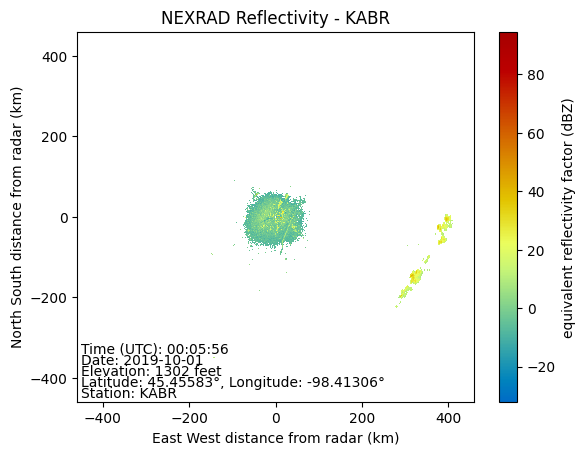

In [25]:
#Basic display of one of the field

display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', 0, title=f'NEXRAD Reflectivity - {station_code}') #0 is the scan number. Change with angles.

plt.text(0.01, 0.01, f'Station: {station_code}', transform=plt.gca().transAxes)
plt.text(0.01, 0.04, f'Latitude: {info["lat"]}°, Longitude: {info["lon"]}°', transform=plt.gca().transAxes)
plt.text(0.01, 0.07, f'Elevation: {info["elev"]} feet', transform=plt.gca().transAxes)
plt.text(0.01, 0.10, f'Date: {formatted_date}', transform=plt.gca().transAxes)
plt.text(0.01, 0.13, f'Time (UTC): {formatted_time}', transform=plt.gca().transAxes)

plt.show()


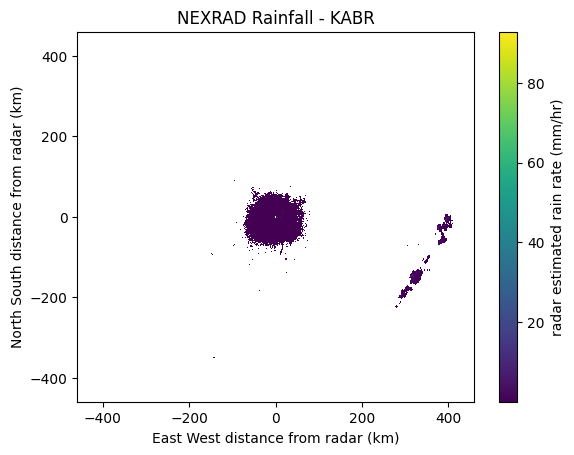

In [30]:

# Convert reflectivity to rainfall rate
rainfall = radar.fields['reflectivity']['data']
rainfall = pyart.retrieve.est_rain_rate_z(radar) #uses a Z-R relationship to convert reflectivity (Z) to rainfall rate (R) in
radar.add_field('rainfall', rainfall)

display.plot('rainfall', 0, title=f'NEXRAD Rainfall - {station_code}') #0 is the scan number. Change with angles.